In [1]:
import fitz  
import re
from collections import defaultdict
import matplotlib.pyplot as plt

import sys
sys.path.append('../../common/')
from common import *


file_path = '2021-OL-GEN.pdf'
doc = fitz.open(file_path)


text = ''
for page in doc:
    text += page.get_text()

text[:1000]  


'2021 RESULTS: GENERAL CERTIFICATE OF EDUCATION EXAMINATION - ORDINARY LEVEL\n2021 GCE RESULTS\nCentre No:  11000 CCAS KUMBA B  \nRegist: 288, Sat for 4 or more Subjects: 133, Passed : 44\n% Passed : 33.08, Sanctioned : 3\nResults of Successful Candidates In Order Of Merit\nPassed In 10 Subjects: 1\nNINA NDOGMOH ARMEL \nAMA-B,BIO-C,CHE-C,ECO-C,ENL-C,FRE-C,GEO-C,HBI-\nC,MAT-B,PHY-C\n(1)\nPassed In 8 Subjects: 5\nKAH MELANIE NSEH \nCOM-C,CTZ-C,ECO-A,ENL-B,FRE-C,GEO-C,HIS-B,LIT-\nB\n(1)\nMBAH MANGA PERRY \nBIO-B,CHE-C,ECO-B,ENL-C,GGY-C,HBI-C,MAT-C,PHY-\nB\n(2)\nFEJA CLIVE NGOH \nBIO-C,CHE-C,CSC-C,ECO-B,ENL-C,GEO-C,HBI-C,PHY-\nC\n(3)\nNGEME ALLOBWEDE MBWOGE \nBIO-B,CHE-C,ECO-C,ENL-C,GEO-C,HBI-C,MAT-C,PHY-\nC\n(4)\nSIR BRANDON NNOKO ESAPE \nCOM-C,CTZ-C,ECO-C,FRE-C,GEO-C,HIS-C,LIT-C,REL-\nC\n(5)\nPassed In 7 Subjects: 4\nNATHALY MBEI DRAH \nBIO-C,COM-C,ECO-B,ENL-B,GEO-C,HIS-A,LIT-B\n(1)\nBAMU GISELE ABONGWA \nAMA-C,BIO-C,CHE-B,ENL-C,FRE-C,MAT-C,PHY-B\n(2)\nESOKA RACHEL MEJANG \nBIO-C,CHE-C,E

In [2]:
pattern = re.compile(r'([A-Z\s]+)\s*([A-Z\n]{3,5}-\n*[A-E]\n*(?:,\s*[A-Z\n]{3,5}-\n*[A-E]\n*)*)\s*\(\d+\)')


In [3]:
candidates = pattern.findall(text)
dict_candidates = { candidate[0].strip(): Record(candidate) for candidate in candidates }
grade_distribution = defaultdict(GradeDist)
gpa_distribution = defaultdict(GradeDist)
# Summary of candidates
print(f"Total number of candidates: {len(dict_candidates)}")

Total number of candidates: 46481


In [4]:
def top_n_percent(grade_distribution, grade, gpa = False):
    total_candidates = len(dict_candidates)
    candidates_considered = 0
    while (grade <= 33) if not gpa else (grade <= 5):
        candidates_considered += grade_distribution[round(grade, 2)].count
        grade += 1 if not gpa else 0.01
    return candidates_considered / (total_candidates*100/70) * 100 # accounting for 70% failure rate

In [5]:


for ind, candidate in enumerate(dict_candidates):
    if ind == 10:
        break
    print(candidate, dict_candidates[candidate])

NINA NDOGMOH ARMEL GPA: 3.20 | 32 points -> {'AMA': 'B', 'BIO': 'C', 'CHE': 'C', 'ECO': 'C', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HBI': 'C', 'MAT': 'B', 'PHY': 'C'}
KAH MELANIE NSEH GPA: 3.62 | 29 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'B'}
MBAH MANGA PERRY GPA: 3.38 | 27 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'B', 'ENL': 'C', 'GGY': 'C', 'HBI': 'C', 'MAT': 'C', 'PHY': 'B'}
FEJA CLIVE NGOH GPA: 3.12 | 25 points -> {'BIO': 'C', 'CHE': 'C', 'CSC': 'C', 'ECO': 'B', 'ENL': 'C', 'GEO': 'C', 'HBI': 'C', 'PHY': 'C'}
NGEME ALLOBWEDE MBWOGE GPA: 3.12 | 25 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'C', 'ENL': 'C', 'GEO': 'C', 'HBI': 'C', 'MAT': 'C', 'PHY': 'C'}
SIR BRANDON NNOKO ESAPE GPA: 3.00 | 24 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'C', 'FRE': 'C', 'GEO': 'C', 'HIS': 'C', 'LIT': 'C', 'REL': 'C'}
NATHALY MBEI DRAH GPA: 3.71 | 26 points -> {'BIO': 'C', 'COM': 'C', 'ECO': 'B', 'ENL': 'B', 'GEO': 'C', 'HIS': 'A', 'LIT': 'B'}


<BarContainer object of 44 artists>

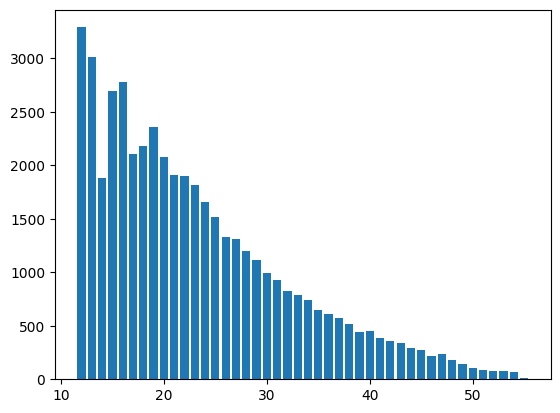

In [6]:
grade_distribution = defaultdict(GradeDist)
for candidate in dict_candidates:
    grade_distribution[dict_candidates[candidate].points].add(candidate)
    gpa_distribution[round(dict_candidates[candidate].gpa, 2)].add(candidate)

plt.bar(grade_distribution.keys(), [grade_distribution[key].count for key in grade_distribution.keys()])

<BarContainer object of 84 artists>

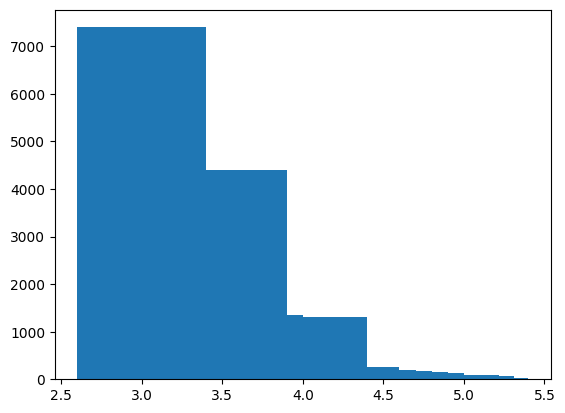

In [7]:
plt.bar(gpa_distribution.keys(), [gpa_distribution[key].count for key in gpa_distribution.keys()])

In [8]:
print("Points \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(grade_distribution.keys(), reverse=True):
    print(f"{key}\t: \t\t{grade_distribution[key]} \t\t: \t\t{top_n_percent(grade_distribution, key):.2f}%")

Points 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
55	: 		13 		: 		0.00%
54	: 		69 		: 		0.00%
53	: 		81 		: 		0.00%
52	: 		73 		: 		0.00%
51	: 		86 		: 		0.00%
50	: 		108 		: 		0.00%
49	: 		143 		: 		0.00%
48	: 		180 		: 		0.00%
47	: 		236 		: 		0.00%
46	: 		216 		: 		0.00%
45	: 		274 		: 		0.00%
44	: 		290 		: 		0.00%
43	: 		335 		: 		0.00%
42	: 		358 		: 		0.00%
41	: 		389 		: 		0.00%
40	: 		451 		: 		0.00%
39	: 		441 		: 		0.00%
38	: 		517 		: 		0.00%
37	: 		570 		: 		0.00%
36	: 		607 		: 		0.00%
35	: 		649 		: 		0.00%
34	: 		737 		: 		0.00%
33	: 		791 		: 		1.19%
32	: 		827 		: 		2.44%
31	: 		929 		: 		3.84%
30	: 		995 		: 		5.33%
29	: 		1110 		: 		7.01%
28	: 		1196 		: 		8.81%
27	: 		1310 		: 		10.78%
26	: 		1326 		: 		12.78%
25	: 		1517 		: 		15.06%
24	: 		1660 		: 		17.56%
23	: 		1817 		: 		20.30%
22	: 		1895 		: 		23.15%
21	: 		1907 		: 		26.02%
20	: 		2077 		: 		29.15%
19	: 		2360 		: 		32.71%
18	: 		2184 		: 		3

In [9]:
print("GPA \t: \tNumber of candidates \t: \tTop n% of candidates")
print("------ \t: \t--------------------- \t: \t--------------------")
for key in sorted(gpa_distribution.keys(), reverse=True):
    if gpa_distribution[key].count == 0:
        continue
    print(f"{key:.2f}\t: \t\t{gpa_distribution[key]} \t\t: \t\t{top_n_percent(gpa_distribution, key, True):.2f}%")

GPA 	: 	Number of candidates 	: 	Top n% of candidates
------ 	: 	--------------------- 	: 	--------------------
5.00	: 		35 		: 		0.05%
4.91	: 		69 		: 		0.16%
4.90	: 		47 		: 		0.23%
4.89	: 		8 		: 		0.24%
4.88	: 		3 		: 		0.24%
4.86	: 		1 		: 		0.25%
4.82	: 		81 		: 		0.37%
4.80	: 		72 		: 		0.48%
4.78	: 		15 		: 		0.50%
4.75	: 		4 		: 		0.50%
4.73	: 		73 		: 		0.61%
4.71	: 		4 		: 		0.62%
4.70	: 		100 		: 		0.77%
4.67	: 		30 		: 		0.82%
4.64	: 		86 		: 		0.95%
4.62	: 		14 		: 		0.97%
4.60	: 		123 		: 		1.15%
4.57	: 		7 		: 		1.16%
4.56	: 		38 		: 		1.22%
4.55	: 		89 		: 		1.35%
4.50	: 		162 		: 		1.60%
4.45	: 		96 		: 		1.74%
4.44	: 		56 		: 		1.83%
4.43	: 		18 		: 		1.85%
4.40	: 		169 		: 		2.11%
4.38	: 		31 		: 		2.16%
4.36	: 		108 		: 		2.32%
4.33	: 		95 		: 		2.46%
4.30	: 		196 		: 		2.76%
4.29	: 		28 		: 		2.80%
4.27	: 		136 		: 		3.00%
4.25	: 		93 		: 		3.14%
4.22	: 		114 		: 		3.31%
4.20	: 		248 		: 		3.69%
4.18	: 		93 		: 		3.83%
4.17	: 		46 		: 		3.90%
4.14	: 		71 		: 		4.0

In [10]:
## All 25 points candidates

print(f"Total {grade_distribution[33].count} candidates with 33 points")
print(f"Candidates with 33 points(top {top_n_percent(grade_distribution, 33):.2f}%):")
for candidate in grade_distribution[33].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 791 candidates with 33 points
Candidates with 33 points(top 1.19%):
	 MBAH TEKANG ETIENNE            	 GPA: 3.30 | 33 points -> {'BIO': 'C', 'CHE': 'C', 'CSC': 'B', 'ECO': 'A', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HBI': 'C', 'MAT': 'C', 'PHY': 'C'}
	 SUMENJABE RAMIEL               	 GPA: 3.67 | 33 points -> {'AMA': 'A', 'BIO': 'C', 'CHE': 'C', 'ECO': 'B', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'MAT': 'A', 'PHY': 'B'}
	 NDEH FRU DIVINE                	 GPA: 3.67 | 33 points -> {'BIO': 'B', 'CHE': 'B', 'CSC': 'B', 'ECO': 'A', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'MAT': 'C', 'PHY': 'B'}
	 DJIOFACK  DJOUMESSI ROCHNELLE  	 GPA: 3.67 | 33 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'A', 'ENL': 'C', 'FRE': 'A', 'GEO': 'C', 'GGY': 'B', 'MAT': 'C', 'PHY': 'C'}
	 CLARISSE YEHPUU TANKA          	 GPA: 3.67 | 33 points -> {'BIO': 'C', 'CHE': 'C', 'ECO': 'A', 'ENL': 'B', 'FNU': 'C', 'FRE': 'A', 'GEO': 'B', 'MAT': 'C', 'PHY': 'C'}
	 BRIGHT                         	 GPA: 3.30 | 33 points -> {'AMA': '

In [11]:
## All 32 points candidates

print(f"Total {grade_distribution[32].count} candidates with 32 points")
print(f"Candidates with 32 points(top {top_n_percent(grade_distribution, 32):.2f}%):")
for candidate in grade_distribution[32].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 827 candidates with 32 points
Candidates with 32 points(top 2.44%):
	 NINA NDOGMOH ARMEL             	 GPA: 3.20 | 32 points -> {'AMA': 'B', 'BIO': 'C', 'CHE': 'C', 'ECO': 'C', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HBI': 'C', 'MAT': 'B', 'PHY': 'C'}
	 MBONI KINGNI ETIENNE LEDOUX    	 GPA: 3.56 | 32 points -> {'BIO': 'C', 'CHE': 'C', 'CSC': 'C', 'ECO': 'B', 'ENL': 'B', 'FRE': 'B', 'GEO': 'B', 'MAT': 'B', 'PHY': 'C'}
	 ENOW TELMA MANYI               	 GPA: 3.56 | 32 points -> {'CSC': 'C', 'ECO': 'A', 'ENL': 'B', 'FRE': 'A', 'GEO': 'C', 'HIS': 'C', 'LIT': 'C', 'MAT': 'C', 'REL': 'C'}
	 GREBANG RAHIM BROWN T          	 GPA: 4.00 | 32 points -> {'COM': 'A', 'CSC': 'C', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'A', 'LIT': 'C', 'MAT': 'C'}
	 AJIVIRI  SANDRINE LEMNYUY      	 GPA: 3.56 | 32 points -> {'BIO': 'C', 'COM': 'B', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'C'}
	 NJOH RONALDO FONCHAM           	 GPA: 3.56 | 32 points -> {'COM': 'C', 'CTZ': '

In [12]:
## All 31 points candidates

print(f"Total {grade_distribution[31].count} candidates with 31 points")
print(f"Candidates with 31 points(top {top_n_percent(grade_distribution, 31):.2f}%):")
for candidate in grade_distribution[31].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 929 candidates with 31 points
Candidates with 31 points(top 3.84%):
	 C
KOLLEKANG JUNIOR ETAPE       	 GPA: 3.44 | 31 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'B', 'HIS': 'C', 'LIT': 'C', 'MAT': 'C'}
	 NONGHO OLIVE NGWATANG          	 GPA: 3.88 | 31 points -> {'BIO': 'B', 'CHE': 'B', 'ECO': 'A', 'ENL': 'C', 'GEO': 'B', 'HBI': 'B', 'MAT': 'C', 'PHY': 'B'}
	 CHOMBONG DOTLY MBUTOH          	 GPA: 3.88 | 31 points -> {'BIO': 'C', 'CHE': 'B', 'CSC': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'B', 'GEO': 'C', 'PHY': 'B'}
	 S EMMANUELLE                   	 GPA: 3.44 | 31 points -> {'AMA': 'B', 'BIO': 'C', 'CHE': 'C', 'ECO': 'C', 'ENL': 'B', 'FRE': 'A', 'GEO': 'C', 'HBI': 'C', 'MAT': 'C'}
	 NGUE MBAGA MISERICORDE PHINEES 	 GPA: 3.88 | 31 points -> {'AMA': 'B', 'BIO': 'C', 'CHE': 'B', 'CSC': 'C', 'ENL': 'C', 'FRE': 'A', 'MAT': 'A', 'PHY': 'B'}
	 MOSIMA FAITH NANYONGO          	 GPA: 3.44 | 31 points -> {'BIO': 'B', 'CHE': 'C', 'CSC': 'B', 'ECO': 'B', 'ENL': '

In [13]:
## All 30 points candidates

print(f"Total {grade_distribution[30].count} candidates with 30 points")
print(f"Candidates with 30 points(top {top_n_percent(grade_distribution, 30):.2f}%):")
for candidate in grade_distribution[30].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 995 candidates with 30 points
Candidates with 30 points(top 5.33%):
	 ALI HOMAMATOU MENGLA           	 GPA: 3.75 | 30 points -> {'COM': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'C', 'LOG': 'B'}
	 AGBOR                          	 GPA: 3.75 | 30 points -> {'COM': 'B', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HIS': 'C', 'LIT': 'A'}
	 DAYO ETINNE DAYO               	 GPA: 3.75 | 30 points -> {'COM': 'B', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'C', 'LIT': 'B'}
	 NTOUBA TATIANA SUMELONG        	 GPA: 3.75 | 30 points -> {'COM': 'B', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'C'}
	 AGWO BELKETE TINYANG           	 GPA: 3.75 | 30 points -> {'CTZ': 'C', 'ECO': 'A', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HIS': 'A', 'LIT': 'A', 'LOG': 'C'}
	 NYINGCHIA PRECHELINE KEBOUH    	 GPA: 3.75 | 30 points -> {'BIO': 'B', 'CHE': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'B', 'MAT': '

In [14]:
## All 29 points candidates

print(f"Total {grade_distribution[29].count} candidates with 29 points")
print(f"Candidates with 29 points(top {top_n_percent(grade_distribution, 29):.2f}%):")
for candidate in grade_distribution[29].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 1110 candidates with 29 points
Candidates with 29 points(top 7.01%):
	 KAH MELANIE NSEH               	 GPA: 3.62 | 29 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'B'}
	 PRINCE UJU KINGSLEY            	 GPA: 3.22 | 29 points -> {'BIO': 'C', 'CHE': 'C', 'CSC': 'C', 'ECO': 'B', 'ENL': 'C', 'GEO': 'B', 'HBI': 'C', 'MAT': 'C', 'PHY': 'C'}
	 BESSEM KAMSU ARLETIA           	 GPA: 3.62 | 29 points -> {'BIO': 'C', 'CSC': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'B', 'GEO': 'C', 'MAT': 'C', 'PHY': 'C'}
	 KAMDEM DEYO KEIPHIRA           	 GPA: 3.62 | 29 points -> {'BIO': 'C', 'CHE': 'C', 'CSC': 'C', 'ECO': 'B', 'ENL': 'C', 'FRE': 'A', 'MAT': 'B', 'PHY': 'B'}
	 NANFACK BRAYAN LEVIS           	 GPA: 3.62 | 29 points -> {'CSC': 'C', 'ECO': 'A', 'ENL': 'C', 'FRE': 'A', 'GEO': 'C', 'HIS': 'C', 'LIT': 'C', 'MAT': 'B'}
	 MBIYDZENYUY BERINICE FOKANYUY  	 GPA: 3.62 | 29 points -> {'CTZ': 'C', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'B', 'HIS': 

In [15]:
## All 28 points candidates

print(f"Total {grade_distribution[28].count} candidates with 28 points")
print(f"Candidates with 28 points(top {top_n_percent(grade_distribution, 28):.2f}%):")
for candidate in grade_distribution[28].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 1196 candidates with 28 points
Candidates with 28 points(top 8.81%):
	 SUH YOLAND AKWANWI             	 GPA: 3.50 | 28 points -> {'COM': 'C', 'CSC': 'C', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'C'}
	 NKUMATEH GIBRIL SILYBEY        	 GPA: 3.50 | 28 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'A', 'ENL': 'B', 'FRE': 'C', 'GEO': 'C', 'HIS': 'B', 'MAT': 'C'}
	 KWEUNYUI ROMARIC               	 GPA: 3.50 | 28 points -> {'COM': 'C', 'CTZ': 'C', 'ECO': 'A', 'ENL': 'C', 'FRE': 'C', 'GEO': 'C', 'HIS': 'A', 'MAT': 'C'}
	 PEUYIH SANDRA NTIENGWE         	 GPA: 3.50 | 28 points -> {'BIO': 'C', 'CHE': 'B', 'ECO': 'A', 'ENL': 'C', 'FRE': 'C', 'GEO': 'B', 'HBI': 'C', 'PHY': 'C'}
	 SABINE WOMBONG                 	 GPA: 3.50 | 28 points -> {'COM': 'B', 'CSC': 'C', 'CTZ': 'B', 'ECO': 'A', 'FRE': 'C', 'GEO': 'C', 'HIS': 'C', 'LIT': 'C'}
	 BRONDEL                        	 GPA: 3.50 | 28 points -> {'BIO': 'C', 'CHE': 'B', 'CSC': 'C', 'ECO': 'B', 'FRE': 'B', 'GEO': 'C', 'MAT': 

In [16]:
## All 27 points candidates

print(f"Total {grade_distribution[27].count} candidates with 27 points")
print(f"Candidates with 27 points(top {top_n_percent(grade_distribution, 27):.2f}%):")
for candidate in grade_distribution[27].names:
    print("\t", return_first_n_chars_or_fill_with_spaces(candidate), "\t",  dict_candidates[candidate])

Total 1310 candidates with 27 points
Candidates with 27 points(top 10.78%):
	 MBAH MANGA PERRY               	 GPA: 3.38 | 27 points -> {'BIO': 'B', 'CHE': 'C', 'ECO': 'B', 'ENL': 'C', 'GGY': 'C', 'HBI': 'C', 'MAT': 'C', 'PHY': 'B'}
	 JOY                            	 GPA: 3.86 | 27 points -> {'COM': 'B', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'B'}
	 APISEH HUMPHREY TEZIE          	 GPA: 3.38 | 27 points -> {'COM': 'C', 'CTZ': 'B', 'ECO': 'B', 'ENL': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'C', 'REL': 'C'}
	 BIH ASHLEY KELMA MUA           	 GPA: 3.86 | 27 points -> {'COM': 'B', 'CTZ': 'C', 'ECO': 'A', 'ENL': 'C', 'GEO': 'C', 'HIS': 'B', 'LIT': 'A'}
	 O                              	 GPA: 3.86 | 27 points -> {'COM': 'C', 'CTZ': 'B', 'ECO': 'A', 'ENL': 'A', 'FNU': 'C', 'GEO': 'B', 'MAT': 'C'}
	 BATE                           	 GPA: 3.86 | 27 points -> {'AMA': 'B', 'CHE': 'B', 'ECO': 'A', 'ENL': 'C', 'GEO': 'C', 'MAT': 'B', 'PHY': 'B'}
	 EPIE NGOME LOUIS MARCEL     